# Importation des librairies

In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [65]:
%matplotlib inline


APPLY_GRIDSEARCH = False
DATA_PATH="data/"
FILTER_DIRECTION = False


print(sorted(os.listdir(DATA_PATH)))

['._DP980Y700_SDG3_2021.csv', '._DP980Y700_SDG3_2021_extended.csv', 'DP980GA_Galma1_upgrade.csv', 'DP980Y700_EKO1_upgrade.csv', 'DP980Y700_SDG3_2021.csv', 'DP980Y700_SDG3_2021_extended.csv', 'DP980Y700_SDG3_2021_upgrade.csv', 'DP980_Sagunto_2021_upgrade.csv']


# Chargement des données
Utilisation d'une dataframe panda

In [66]:
df1 = pd.read_csv(DATA_PATH + 'DP980Y700_SDG3_2021_upgrade.csv', delimiter =";", decimal=",")
df2 = pd.read_csv(DATA_PATH + 'DP980GA_Galma1_upgrade.csv', delimiter =";", decimal=",")
df3 = pd.read_csv(DATA_PATH + 'DP980Y700_EKO1_upgrade.csv', delimiter =";", decimal=",")
df4 = pd.read_csv(DATA_PATH + 'DP980_Sagunto_2021_upgrade.csv', delimiter =";", decimal=",")


frames = [df1, df2, df3, df4]

df = pd.concat(frames, ignore_index=True)
df = df.fillna(0) # replace NaN by 0

# Description des données

In [67]:
df.head()

,Coilnr,Date,Direction,Type eprouvette,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,C ppm,Mn ppm,...,B ppm,Mo ppm,Linespeed (m/min),SKP elongation (%),Heating C/s 660 to 750,t_soaking_hot s,Cooling C/s,t_soaking_cold s,soaking_hot C,soaking_cold C
0,41971853,44202,L,I20,1.92,791.0,1058.0,107.0,813.0,25430,...,19.0,959.0,51.922714,0.395166,1.373933,101.689599,-13.559891,57.778181,798.669830,487.601574
1,41943566,44204,L,I20,1.01,690.0,1029.0,114.0,713.0,25290,...,18.0,942.0,130.468628,0.453954,3.771506,40.469499,-33.617532,22.994033,804.154785,497.245289
2,42071675,44205,L,I20,1.62,796.0,1037.0,106.0,758.0,25530,...,20.0,967.0,78.013863,0.394861,2.374375,67.680279,-21.721390,38.454704,813.640350,484.193967
3,42071668,44205,L,I20,1.62,745.0,1036.0,105.0,758.0,25530,...,20.0,967.0,76.819946,0.394584,2.412430,68.732149,-21.563130,39.052357,814.985870,481.330018
4,42071705,44206,L,I20,1.92,776.0,1006.0,95.0,735.0,25686,...,19.0,959.0,63.891125,0.452333,2.008020,82.640586,-16.760875,46.954879,807.002014,481.701958


In [68]:
df.describe()

,Coilnr,Th mm,Re02 Mpa,Rm Mpa,A80 x10%,C ppm,Mn ppm,Si ppm,P ppm,S ppm,...,B ppm,Mo ppm,Linespeed (m/min),SKP elongation (%),Heating C/s 660 to 750,t_soaking_hot s,Cooling C/s,t_soaking_cold s,soaking_hot C,soaking_cold C
count,1.996000e+03,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,...,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000,1996.000000
mean,2.952998e+07,1.373724,707.456612,1017.140296,111.176854,732.923444,25127.706413,2564.928694,122.451880,14.443933,...,19.562321,933.649262,88.773042,0.205413,3.718466,70.993123,-29.456271,38.014392,802.961173,469.865110
std,3.388363e+07,0.308761,54.269892,26.523060,19.632942,25.144506,337.344519,127.159362,15.246136,8.415148,...,1.663071,51.696319,25.160890,0.141161,1.600903,29.172312,9.897381,13.084105,16.787222,11.139825
min,2.000010e+05,0.800000,465.000000,819.333333,34.200000,675.000000,24326.000000,2290.000000,85.000000,0.000000,...,16.000000,790.000000,40.851750,0.022126,1.373933,7.228916,-52.125338,19.518072,735.250000,398.020000
25%,2.137158e+05,1.160000,675.554625,999.000000,98.200000,716.000000,24850.000000,2489.000000,113.000000,7.000000,...,18.990000,908.000000,72.059122,0.090856,2.402294,51.893461,-36.263060,28.285471,803.399959,462.966325
50%,5.243560e+05,1.370000,704.000000,1017.000000,109.500000,729.000000,25086.000000,2560.000000,121.000000,15.000000,...,19.000000,939.000000,89.408657,0.120000,3.506820,62.977811,-27.933792,33.704032,808.926773,467.229265
75%,4.700677e+07,1.600000,741.125000,1034.000000,120.925000,750.000000,25340.000000,2624.000000,130.000000,20.000000,...,21.000000,968.250000,110.383412,0.393317,4.658361,81.578940,-21.584996,43.197805,811.428798,479.077892
max,9.265894e+07,2.040000,851.000000,1112.400000,191.000000,821.000000,26220.000000,3230.000000,178.990000,40.000000,...,33.666667,1136.000000,147.113602,0.520000,18.697776,157.317073,-11.168831,77.707317,851.462820,515.000000


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1996 entries, 0 to 1995
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Coilnr                  1996 non-null   int64  
 1   Date                    1996 non-null   object 
 2   Direction               1996 non-null   object 
 3   Type eprouvette         1996 non-null   object 
 4   Th mm                   1996 non-null   float64
 5   Re02 Mpa                1996 non-null   float64
 6   Rm Mpa                  1996 non-null   float64
 7   A80 x10%                1996 non-null   float64
 8   C ppm                   1996 non-null   float64
 9   Mn ppm                  1996 non-null   int64  
 10  Si ppm                  1996 non-null   float64
 11  P ppm                   1996 non-null   float64
 12  S ppm                   1996 non-null   float64
 13  Al ppm                  1996 non-null   float64
 14  Ti ppm                  1996 non-null   

# Separation du dataset en train-set et test-set

In [70]:
# Integrer deux nouveaux fichiers, essayer sans prendre la vitesse de ligne, sans le sens transverse... Montrer les mêmes graphs
# Penser aussi à retirer coilnumber
# Optimiser les réseaux de neurones

# Ajouter les deux lignes + relancer tous les entrainements
# Faire un tableau qui resume les résultats en fonction des algos et features
# Ajouter d'autres modeles de ML + viz des features importances
# Faire du wrapper ou filtre multivarié par lignes
# Faire un script de moyennes


# Application des filtres
filters = df[["Date", "Direction", "Type eprouvette", "Coilnr"]]

if FILTER_DIRECTION:
    df = df[ df.Direction == 'L']

target_re02 = df[["Re02 Mpa"]]
target_rm = df[["Rm Mpa"]]
target_A = df[["A80 x10%"]]

features = df.drop(target_A + target_re02 + target_rm + filters ,axis=1)



In [71]:
len(np.where(df.Direction == 'T')[0])

305

In [72]:
from sklearn.model_selection import train_test_split

# Séparation du dataset en train et test
X_train,X_test,Y_train_rm,Y_test_rm = train_test_split(features,target_rm,test_size=0.20,random_state=0)
Y_train_rm = Y_train_rm.values.ravel()
Y_test_rm = Y_test_rm.values.ravel()

X_train_re02,X_test_re02,Y_train_re02,Y_test_re02 = train_test_split(features,target_re02,test_size=0.20,random_state=0)
Y_train_re02 = Y_train_re02.values.ravel()
Y_test_re02 = Y_test_re02.values.ravel()

X_train_A,X_test_A,Y_train_A,Y_test_A = train_test_split(features,target_A,test_size=0.20,random_state=0)
Y_train_A = Y_train_A.values.ravel()
Y_test_A = Y_test_A.values.ravel()

print(X_train.shape, X_test.shape, Y_train_rm.shape, Y_test_rm.shape)

(1596, 20) (400, 20) (1596,) (400,)


In [73]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)

print(X_train)
print(X_test)

[[0.96774194 0.67123288 0.39281943 ... 0.85484521 0.15273702 0.51273722]
 [0.90322581 0.58219178 0.95776135 ... 0.63822229 0.56582513 0.77118136]
 [0.80645161 0.26712329 0.31942978 ... 0.39424204 0.64140888 0.57519234]
 ...
 [0.21774194 0.37671233 0.28194298 ... 0.15866344 0.6054366  0.53976714]
 [0.33064516 0.37671233 0.44033791 ... 0.17318936 0.69870323 0.78076273]
 [0.64516129 0.35616438 0.38225977 ... 0.75962367 0.22802992 0.5469311 ]]
[[0.45967742 0.48630137 0.63041183 ... 0.22601022 0.68617822 0.79991177]
 [0.45967742 0.23972603 0.32101373 ... 0.22227709 0.63785239 0.59587425]
 [0.96774194 0.45890411 0.6937698  ... 0.88129564 0.2430885  0.50418875]
 ...
 [0.80645161 0.29452055 0.27296727 ... 0.40051124 0.62617532 0.5759959 ]
 [0.32258065 0.21226027 0.44033791 ... 0.73815215 0.29041546 0.58112498]
 [0.45967742 0.2260274  0.51953537 ... 0.21797961 0.69503601 0.80400781]]


# Modele de Régression

## Importation des métriques

In [74]:
from sklearn.metrics import r2_score, mean_squared_error

## Random Forest

### Prédiction de la résistance mécanique $R_m$

In [75]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

rfr = ExtraTreesRegressor(bootstrap=False, n_jobs=-1)



if APPLY_GRIDSEARCH:
    param_grid = { 
                "min_samples_split" : np.arange(4, 8, 2),
                'max_depth': np.arange(20, 28, 1),
                'max_features': np.arange(10, 20, 1),
                'n_estimators': np.arange(70, 120, 5),
                }

    rfr_cv = GridSearchCV(rfr, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    rfr_cv.fit(X_train, Y_train_rm)
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)
    
    rfr = rfr_cv.best_estimator_
    
else:
    rfr = ExtraTreesRegressor(bootstrap=False, 
                                max_depth=23, 
                                max_features=11,
                                min_samples_split=6, 
                                n_estimators=105, 
                                n_jobs=-1)

rfr.fit(X_train, Y_train_rm)
print(rfr.score(X_train, Y_train_rm))
print(rfr.score(X_test, Y_test_rm))


Y_pred_rfr = rfr.predict(X_test)
print(Y_pred_rfr.shape)
print(Y_test_rm.shape)

r2_rm   = r2_score(Y_test_rm, Y_pred_rfr)
mse_rm  = mean_squared_error(Y_test_rm, Y_pred_rfr)
rmse_rm = mse_rm**(.5)


print("R2_score : ", r2_rm)
print("MSE : ", mse_rm)
print("RMSE : ", rmse_rm)


Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n

In [76]:
if APPLY_GRIDSEARCH:
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)

ExtraTreesRegressor(max_depth=23, max_features=11, min_samples_split=6,
                    n_estimators=105, n_jobs=-1) {'max_depth': 23, 'max_features': 11, 'min_samples_split': 6, 'n_estimators': 105} 0.5434806810798027


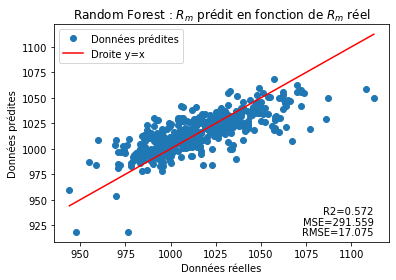

In [77]:
plt.title("Random Forest : $R_{m}$ prédit en fonction de $R_{m}$ réel")
plt.plot( Y_test_rm, Y_pred_rfr, 'o', label = "Données prédites")
plt.plot([min(Y_test_rm),max(Y_test_rm)], [min(Y_test_rm),max(Y_test_rm)], 'r', label = "Droite y=x")
plt.legend()
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr) + 20, s="R2=" + str(round(r2_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr) + 10, s="MSE=" + str(round(mse_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_rm), y = min(Y_pred_rfr), s="RMSE=" + str(round(rmse_rm,3)), horizontalalignment='right',
     verticalalignment='center')
plt.show()

### Affichage des features

[0.03641545 0.11617589 0.04740869 0.04824764 0.02778234 0.02446547
 0.02965099 0.03162228 0.02853626 0.03041308 0.04903694 0.04132114
 0.06555806 0.06097541 0.04785694 0.05798595 0.05589524 0.05576046
 0.11181306 0.03307871]

 Feature ranking
1 C ppm 	 0.11617588532237703
2 soaking_hot C 	 0.11181306108191866
3 Linespeed (m/min) 	 0.0655580563786836
4 SKP elongation (%) 	 0.060975410248368465
5 t_soaking_hot s 	 0.057985949869451756
6 Cooling C/s 	 0.05589524132430019
7 t_soaking_cold s 	 0.055760464504792065
8 B ppm 	 0.049036939600860245
9 Si ppm 	 0.048247640699730227
10 Heating C/s 660 to 750 	 0.04785693584266198
11 Mn ppm 	 0.047408687849420816
12 Mo ppm 	 0.04132113563901546
13 Th mm 	 0.036415451665201874
14 soaking_cold C 	 0.03307871294421694
15 Ti ppm 	 0.03162228031270616
16 Nb ppm 	 0.03041308331172021
17 Al ppm 	 0.029650993145279254
18 Cr ppm 	 0.028536260827320133
19 P ppm 	 0.0277823415474735
20 S ppm 	 0.02446546788450171


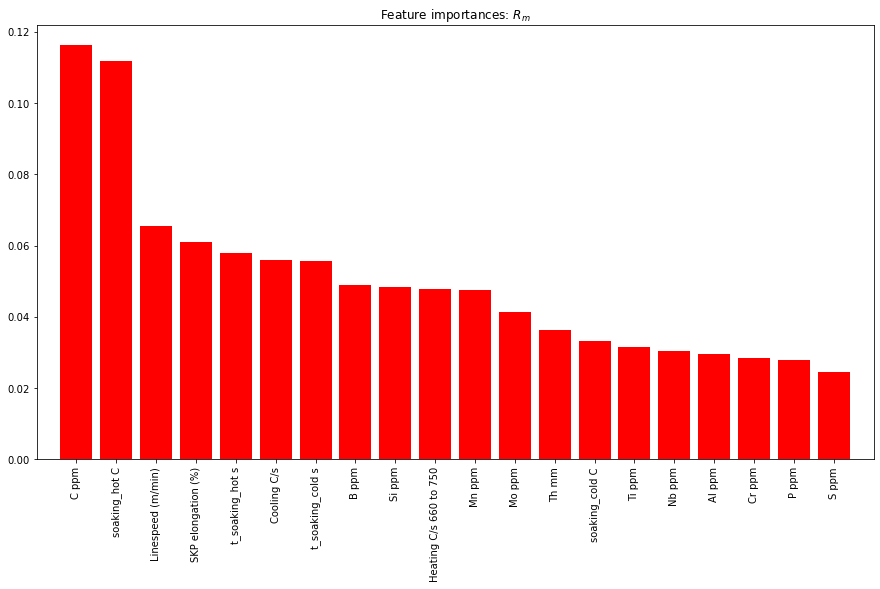

In [78]:
importances = rfr.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
feature_names = features.columns
# Print the feature ranking
print("\n Feature ranking")
 
for f in range(X_train.shape[1]):
    print(f+1, feature_names[indices[f]],'\t', importances[indices[f]])
 
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances: $R_{m}$")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, len(importances)])
plt.show()

### Prédiction de la résistance élastique à 0.2% $R_{e0.2}$

In [79]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

rfr_re02 = ExtraTreesRegressor(bootstrap=False, n_jobs=-1)

if APPLY_GRIDSEARCH:
    param_grid = { 
                "min_samples_split" : np.arange(4, 8, 2),
                'max_depth': np.arange(20, 28, 1),
                'max_features': np.arange(10, 20, 1),
                'n_estimators': np.arange(70, 120, 5),
                }

    rfr_cv = GridSearchCV(rfr_re02, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    rfr_cv.fit(X_train, Y_train_rm)
    
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)
    
    rfr_re02 = rfr_cv.best_estimator_
    
else:
    rfr_re02 = ExtraTreesRegressor(   bootstrap=False, 
                                    max_depth=23, 
                                    max_features=11,
                                    min_samples_split=6, 
                                    n_estimators=110, 
                                    n_jobs=-1)




rfr_re02.fit(X_train_re02, Y_train_re02)
print(rfr_re02.score(X_train_re02, Y_train_re02))
print(rfr_re02.score(X_test_re02, Y_test_re02))

Y_pred_rfr_re02 = rfr_re02.predict(X_test_re02)
print(Y_pred_rfr_re02.shape)
print(Y_test_re02.shape)

r2_re02   = r2_score(Y_test_re02, Y_pred_rfr_re02)
mse_re02  = mean_squared_error(Y_test_re02, Y_pred_rfr_re02)
rmse_re02 = mse_re02**(.5)

print("R2_score : ", r2_re02)
print("MSE : ", mse_re02)
print("RMSE : ", rmse_re02)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.2s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n

In [80]:
if APPLY_GRIDSEARCH:
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)

ExtraTreesRegressor(max_depth=23, max_features=11, min_samples_split=6,
                    n_estimators=110, n_jobs=-1) {'max_depth': 23, 'max_features': 11, 'min_samples_split': 6, 'n_estimators': 110} 0.5446888707077578


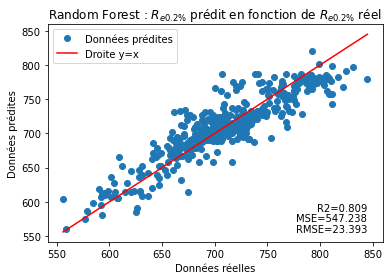

In [81]:
plt.title("Random Forest : $R_{e0.2\%}$ prédit en fonction de $R_{e0.2\%}$ réel")
plt.plot(Y_test_re02, Y_pred_rfr_re02, 'o', label = "Données prédites")
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.plot([min(Y_test_re02),max(Y_test_re02)], [min(Y_test_re02),max(Y_test_re02)], 'r', label = "Droite y=x")
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02) + 30, s="R2=" + str(round(r2_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02) + 15, s="MSE=" + str(round(mse_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_re02), y = min(Y_pred_rfr_re02), s="RMSE=" + str(round(rmse_re02,3)), horizontalalignment='right',
     verticalalignment='center')
plt.legend()
plt.show()

### Affichage des features

[0.03025036 0.0246591  0.03459202 0.01285081 0.01131427 0.0114054
 0.01245263 0.04137623 0.0469664  0.01006273 0.01631246 0.01399268
 0.05166435 0.1610932  0.02948289 0.0989931  0.03502288 0.06627934
 0.19224601 0.09898316]

 Feature ranking:
1 soaking_hot C 	 0.19224601258523485
2 SKP elongation (%) 	 0.1610932029180564
3 t_soaking_hot s 	 0.09899309715668264
4 soaking_cold C 	 0.09898315807595288
5 t_soaking_cold s 	 0.06627933651853288
6 Linespeed (m/min) 	 0.05166434772031106
7 Cr ppm 	 0.04696639631715662
8 Ti ppm 	 0.04137623206920146
9 Cooling C/s 	 0.035022876053916636
10 Mn ppm 	 0.034592021095328614
11 Th mm 	 0.030250356002948973
12 Heating C/s 660 to 750 	 0.029482894860841775
13 C ppm 	 0.024659096053495585
14 B ppm 	 0.016312463567718236
15 Mo ppm 	 0.013992675631886161
16 Si ppm 	 0.012850806322404736
17 Al ppm 	 0.012452627317465699
18 S ppm 	 0.011405397232843005
19 P ppm 	 0.011314274030079327
20 Nb ppm 	 0.010062728469942479


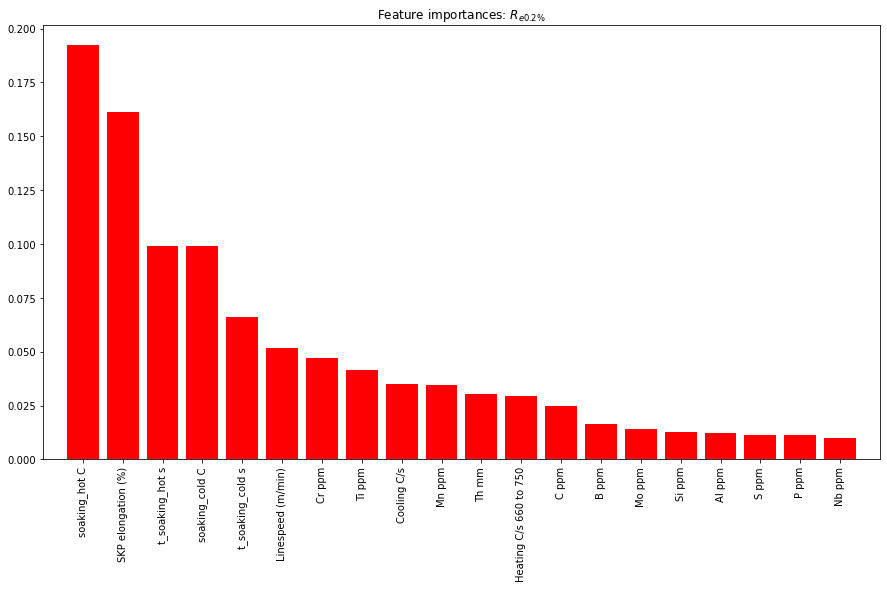

In [82]:
importances = rfr_re02.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
feature_names = features.columns
# Print the feature ranking
print("\n Feature ranking:")
 
for f in range(X_train.shape[1]):
    print(f+1, feature_names[indices[f]],'\t', importances[indices[f]])
 
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances: $R_{e0.2\%}$")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, len(importances)])
plt.show()

### Prédiction de l'allongement à la rupture $A_\%$

In [83]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import GridSearchCV

rfr_A = ExtraTreesRegressor(bootstrap=False, n_jobs=-1)

if APPLY_GRIDSEARCH:
    param_grid = { 
                "min_samples_split" : np.arange(4, 8, 2),
                'max_depth': np.arange(20, 28, 1),
                'max_features': np.arange(10, 20, 1),
                'n_estimators': np.arange(70, 120, 5),
                }

    rfr_cv = GridSearchCV(rfr_A, param_grid=param_grid, n_jobs=-1, cv=5, verbose=2)
    rfr_cv.fit(X_train, Y_train_rm)
    
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)
    
    rfr_A = rfr_cv.best_estimator_
    
else:
    rfr_A = ExtraTreesRegressor(  bootstrap=False, 
                                max_depth=21, 
                                max_features=10,
                                min_samples_split=6, 
                                n_estimators=70, 
                                n_jobs=-1)




rfr_A.fit(X_train_A, Y_train_A)
print(rfr_A.score(X_train_A, Y_train_A))
print(rfr_A.score(X_test_A, Y_test_A))

Y_pred_rfr_A = rfr_A.predict(X_test_A)
print(Y_pred_rfr_A.shape)
print(Y_test_A.shape)


r2_A   = r2_score(Y_test_A, Y_pred_rfr_A)
mse_A  = mean_squared_error(Y_test_A, Y_pred_rfr_A)
rmse_A = mse_A**(.5)

print("R2_score : ", r2_A)
print("MSE : ", mse_A)
print("RMSE : ", rmse_A)

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=70; total time=   0.2s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.4s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n_estimators=75; total time=   0.3s
[CV] END max_depth=20, max_features=10, min_samples_split=4, n

In [84]:
if APPLY_GRIDSEARCH:
    print(rfr_cv.best_estimator_, rfr_cv.best_params_, rfr_cv.best_score_)

ExtraTreesRegressor(max_depth=21, max_features=10, min_samples_split=6,
                    n_estimators=70, n_jobs=-1) {'max_depth': 21, 'max_features': 10, 'min_samples_split': 6, 'n_estimators': 70} 0.545111464974586


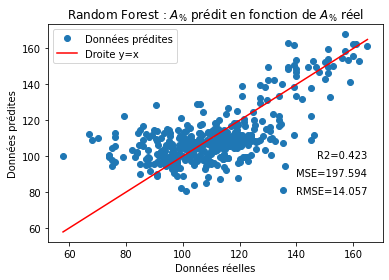

In [85]:
plt.title("Random Forest : $A_{\%}$ prédit en fonction de $A_{\%}$ réel")
plt.plot( Y_test_A, Y_pred_rfr_A, 'o',label = "Données prédites")
plt.xlabel("Données réelles")
plt.ylabel("Données prédites")
plt.plot([min(Y_test_A),max(Y_test_A)], [min(Y_test_A),max(Y_test_A)], 'r', label = "Droite y=x")
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A) + 20, s="R2=" + str(round(r2_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A) + 10, s="MSE=" + str(round(mse_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.text(x= max(Y_test_A), y = min(Y_pred_rfr_A), s="RMSE=" + str(round(rmse_A,3)), horizontalalignment='right',
     verticalalignment='center')
plt.legend()
plt.show()

### Affichage des features

[0.02927964 0.01722221 0.02517476 0.01996505 0.01597175 0.01805291
 0.01847737 0.03304643 0.03732186 0.01544117 0.01827081 0.01647992
 0.07740421 0.07194429 0.04974078 0.12081019 0.06641804 0.10524214
 0.20569644 0.03804   ]

 Feature ranking:
1 soaking_hot C 	 0.2056964418435151
2 t_soaking_hot s 	 0.12081019461180754
3 t_soaking_cold s 	 0.1052421417676192
4 Linespeed (m/min) 	 0.07740420634150058
5 SKP elongation (%) 	 0.07194429149886318
6 Cooling C/s 	 0.06641804432877198
7 Heating C/s 660 to 750 	 0.049740781339207056
8 soaking_cold C 	 0.03804000076892383
9 Cr ppm 	 0.03732186304070926
10 Ti ppm 	 0.0330464311436289
11 Th mm 	 0.02927963936777659
12 Mn ppm 	 0.025174758455523052
13 Si ppm 	 0.019965054214790653
14 Al ppm 	 0.0184773735772699
15 B ppm 	 0.018270813013869066
16 S ppm 	 0.01805290895756277
17 C ppm 	 0.017222212992646372
18 Mo ppm 	 0.016479916813105993
19 P ppm 	 0.015971753846339694
20 Nb ppm 	 0.01544117207656942


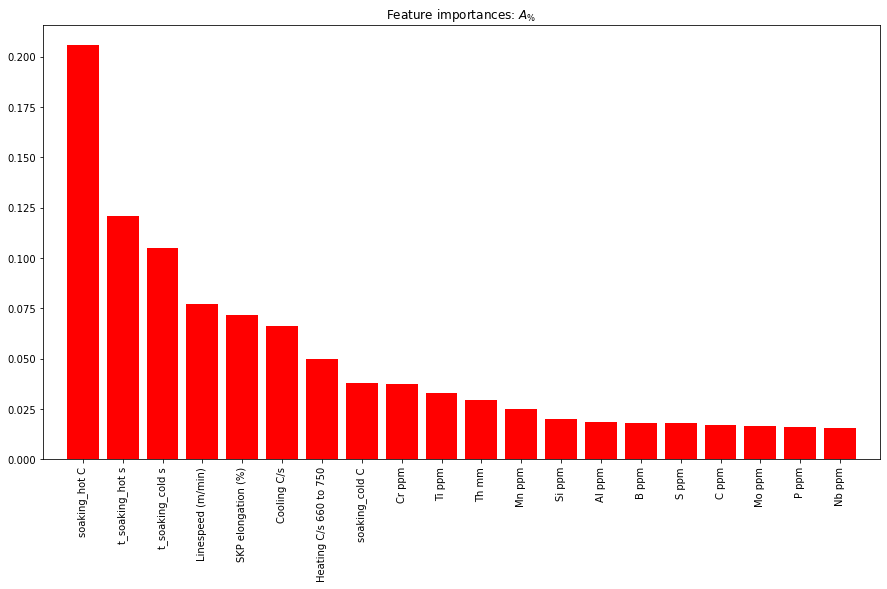

<class 'pandas.core.indexes.base.Index'>


In [86]:
importances = rfr_A.feature_importances_
print(importances)
indices = np.argsort(importances)[::-1]
feature_names = features.columns
# Print the feature ranking
print("\n Feature ranking:")
 
for f in range(X_train.shape[1]):
    print(f+1, feature_names[indices[f]],'\t', importances[indices[f]])
 
# Plot the feature importances of the forest
plt.figure(figsize=(15,8))
plt.title("Feature importances: $A_{\%}$ ")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r")
plt.xticks(range(X_train.shape[1]), [feature_names[i] for i in indices], rotation='vertical')
plt.xlim([-1, len(importances)])
plt.show()
#df.corr()["Ti ppm"]

print(type(feature_names))

# Enregistrement des modèles

In [87]:
import pickle

modele_path = "./modeles/"

# now you can save it to a file
with open(modele_path + 'random_forest_re02_3_upgrade.pkl', 'wb') as f:
    pickle.dump(rfr_re02, f)

with open(modele_path + 'random_forest_rm_3_upgrade.pkl', 'wb') as f:
    pickle.dump(rfr, f)
    
with open(modele_path + 'random_forest_A_3_upgrade.pkl', 'wb') as f:
    pickle.dump(rfr_A, f)  


# Chargement des modèles

In [88]:
import pickle
modele_path = "./modeles/"

with open(modele_path + 'random_forest_rm_3_upgrade.pkl', 'rb') as f:
    clf_rm = pickle.load(f)
print("-------------------------")
print("Résistance mécanique Rm")
print("-------------------------")
print("Train: ",clf_rm.score(X_train, Y_train_rm))
print("Test: ", clf_rm.score(X_test, Y_test_rm))

with open(modele_path + 'random_forest_re02_3_upgrade.pkl', 'rb') as f:
    clf_re02 = pickle.load(f)
    
print("-------------------------")
print("Résistance élastique Re02")
print("-------------------------")
print("Train: ", clf_re02.score(X_train_re02, Y_train_re02))
print("Test: ", clf_re02.score(X_test_re02, Y_test_re02))

with open(modele_path + 'random_forest_A_3_upgrade.pkl', 'rb') as f:
    clf_A = pickle.load(f)
print("-------------------------")
print("Allongement à la rupture A%")
print("-------------------------")
print("Train: ",clf_A.score(X_train_A, Y_train_A))
print("Test: ", clf_A.score(X_test_A, Y_test_A))


-------------------------
Résistance mécanique Rm
-------------------------
Train:  0.9224798377882871
Test:  0.5717384787361011
-------------------------
Résistance élastique Re02
-------------------------
Train:  0.9616872225836733
Test:  0.8086070821165912
-------------------------
Allongement à la rupture A%
-------------------------
Train:  0.9126428694915806
Test:  0.4230255789547732
